In [1]:
suppressPackageStartupMessages(library(ArchR))
suppressPackageStartupMessages(library(ArchRNA))
suppressPackageStartupMessages(library(parallel))   
suppressWarnings(addArchRGenome("hg19"))

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘Matrix’ was built under R version 4.1.3”
Warning message:
“package ‘magrittr’ was built under R version 4.1.3”
Setting default genome to Hg19.



In [2]:
download.file("https://cf.10xgenomics.com/samples/cell-exp/4.0.0/Parent_NGSC3_DI_PBMC/Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5", destfile = "pbmc10k_filt.h5")

In [3]:
proj <- suppressMessages(suppressWarnings(RnaArchRProject(c("pbmc10k_filt.h5"), c("pbmc"), "pbmc")))

In [4]:
getAvailableMatrices(proj)

[1] "GeneExpressionMatrix"

In [5]:
x = getMatrixFromProject(proj, "GeneExpressionMatrix", useSeqnames = 'counts')
x

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-8d126192b0a0b-Date-2023-02-26_Time-21-28-01.log
If there is an issue, please report to github with logFile!

2023-02-26 21:28:09 : Organizing colData, 0.131 mins elapsed.

2023-02-26 21:28:09 : Organizing rowData, 0.131 mins elapsed.

2023-02-26 21:28:09 : Organizing rowRanges, 0.132 mins elapsed.

2023-02-26 21:28:09 : Organizing Assays (1 of 1), 0.132 mins elapsed.

2023-02-26 21:28:09 : Constructing SummarizedExperiment, 0.132 mins elapsed.

2023-02-26 21:28:09 : Finished Matrix Creation, 0.144 mins elapsed.



class: SummarizedExperiment 
dim: 36591 10194 
metadata(0):
assays(1): counts
rownames(36591): MIR1302-2HG FAM138A ... AC007325.4 AC007325.2
rowData names(2): idx name
colnames(10194): pbmc#AAACCCACATAACTCG-1 pbmc#AAACCCACATGTAACC-1 ...
  pbmc#TTTGTTGTCGTTATCT-1 pbmc#TTTGTTGTCTTTGCTA-1
colData names(5): Gex_MitoRatio Gex_nGenes Gex_nUMI Gex_RiboRatio
  Sample

In [6]:
str(x)

Formal class 'SummarizedExperiment' [package "SummarizedExperiment"] with 5 slots
  ..@ colData        :Formal class 'DFrame' [package "S4Vectors"] with 6 slots
  .. .. ..@ rownames       : chr [1:10194] "pbmc#AAACCCACATAACTCG-1" "pbmc#AAACCCACATGTAACC-1" "pbmc#AAACCCAGTGAGTCAG-1" "pbmc#AAACCCAGTGCTTATG-1" ...
  .. .. ..@ nrows          : int 10194
  .. .. ..@ listData       :List of 5
  .. .. .. ..$ Gex_MitoRatio: num [1:10194(1d)] 5.53 8.95 6.53 31.63 8.09 ...
  .. .. .. ..$ Gex_nGenes   : num [1:10194(1d)] 4802 2232 4324 343 4143 ...
  .. .. .. ..$ Gex_nUMI     : num [1:10194(1d)] 22574 7757 21733 860 15311 ...
  .. .. .. ..$ Gex_RiboRatio: num [1:10194(1d)] 24.99 33.71 19.3 1.86 15.1 ...
  .. .. .. ..$ Sample       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. ..@ values         : chr "pbmc"
  .. .. .. .. .. ..@ lengths        : int 10194
  .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. ..@ metadata       : list()
  .. .. ..@ elementType    : ch

In [7]:
proj <- suppressMessages(addRNAIterativeLSI(proj))

Warning message in if (grepl("log", units, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (units %in% "BinarizedCounts") {:
“the condition has length > 1 and only the first element will be used”


In [8]:
proj <- suppressMessages(addClusters(proj, reducedDims = "RNAIterativeLSI", biasCol = "Gex_nUMI"))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10194
Number of edges: 395103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8922
Number of communities: 20
Elapsed time: 1 seconds


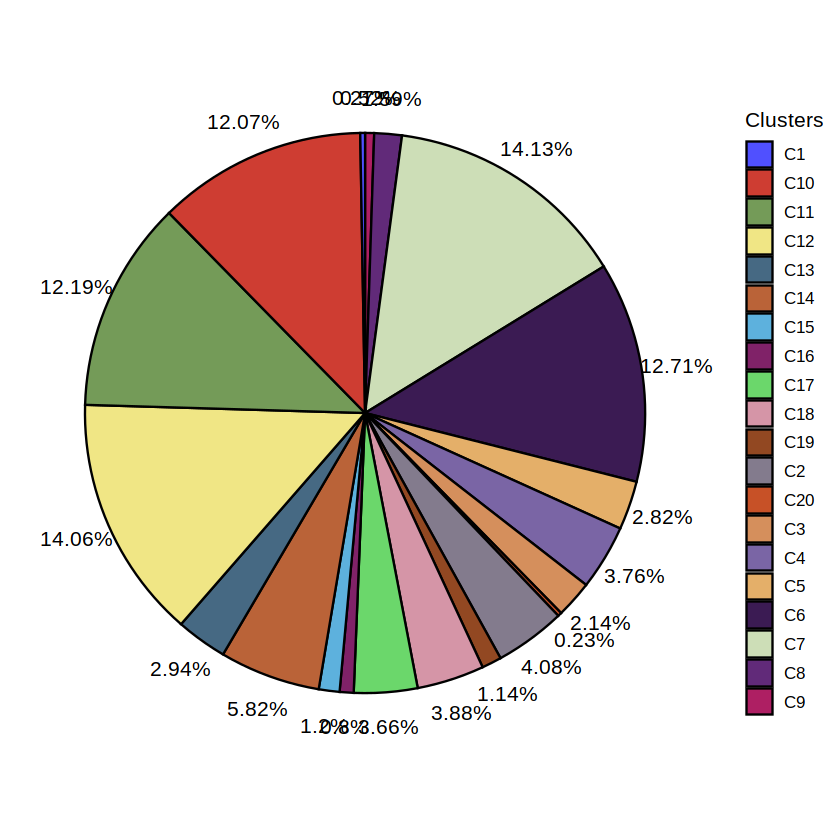

In [9]:
PiePlotS(proj, Cluster="Clusters")

In [10]:
proj <- suppressMessages(addUMAP(proj, reducedDims = "RNAIterativeLSI", verbose = F, force=T))

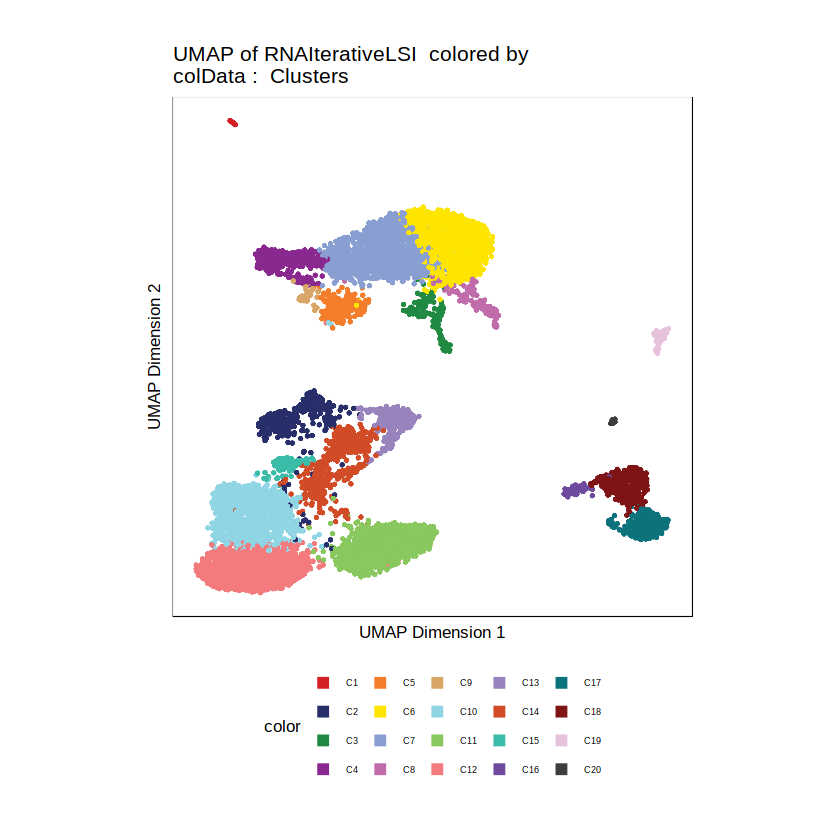

In [11]:
p1 <- suppressMessages(plotEmbedding(proj, name = "Clusters", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F))
p1 

Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“assay is NULL, use first assay counts!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“features is NULL, use all features!”
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of SPINK1.”


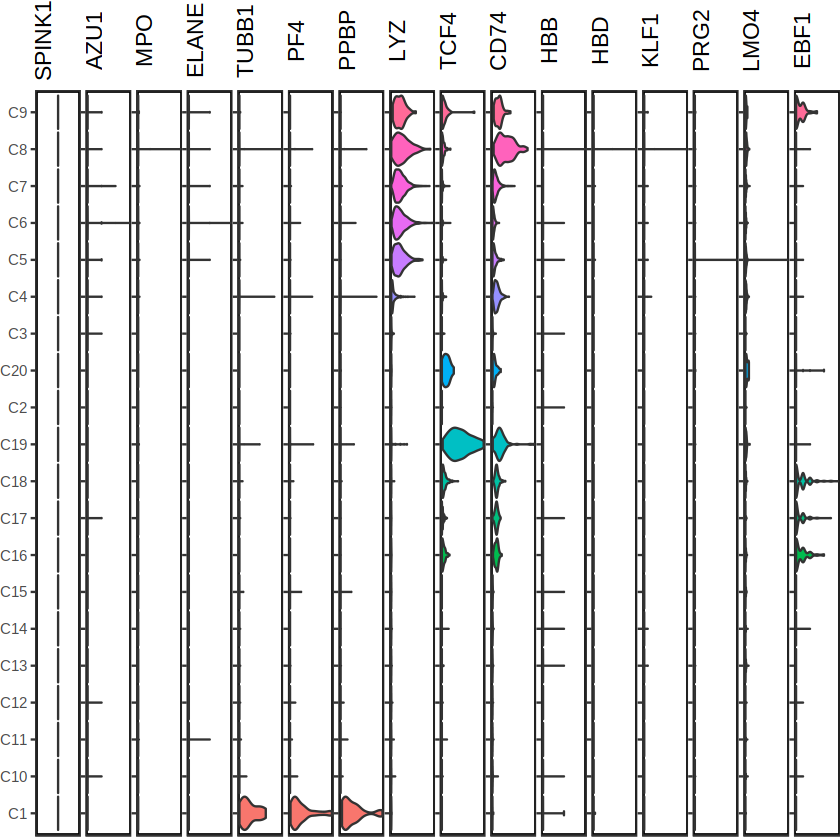

In [12]:
genes <- c("SPINK1", "AZU1", "MPO", "ELANE", "TUBB1", "PF4", "PPBP", "LYZ", "TCF4", "CD74", "HBB", "HBD", "KLF1", "PRG2", "LMO4", "EBF1")  
suppressMessages(VlnMatrixPlotS(proj, features = genes, Cluster="Clusters", leftmost_width = 1.6))

Warning message in DotPlotS(proj, features = genes, group.by = "Clusters"):
“useMatrix is NULL, use first matrix GeneExpressionMatrix!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“assay is NULL, use first assay counts!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“features is NULL, use all features!”


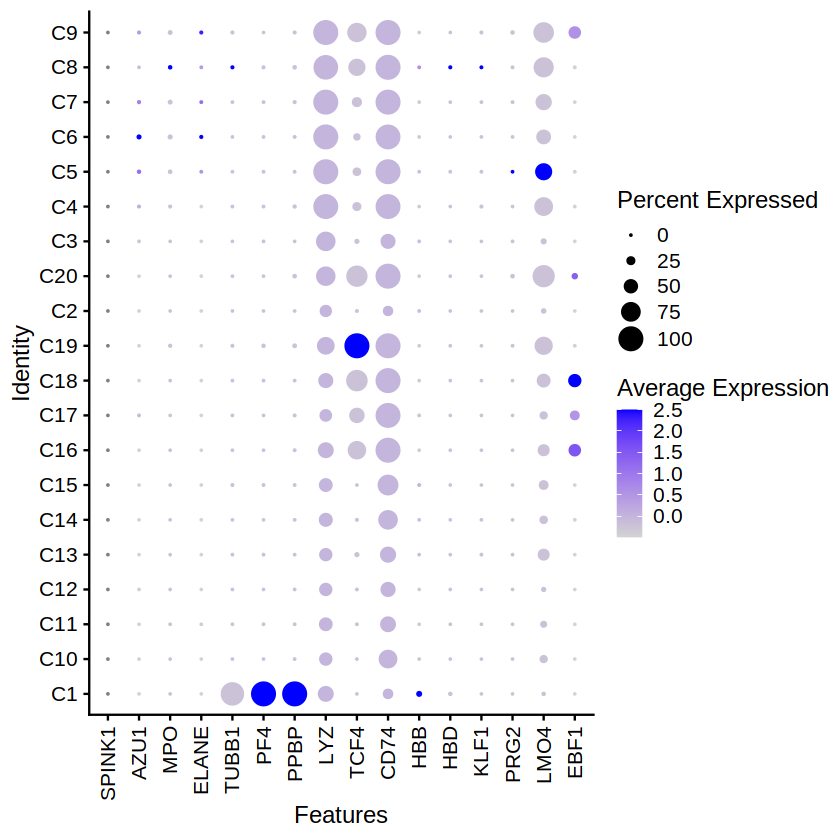

In [13]:
suppressMessages(DotPlotS(proj, features=genes, group.by="Clusters") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)))

In [14]:
proj <- suppressMessages(addTrajectory(proj, trajectory = c("C16","C17","C15", "C19", "C18"), reducedDims = "RNAIterativeLSI", force=T))

Warning message:
“Removed 9214 rows containing non-finite values (`stat_summary_hex()`).”
Warning message:
“Removed 9214 rows containing non-finite values (`stat_summary_hex()`).”


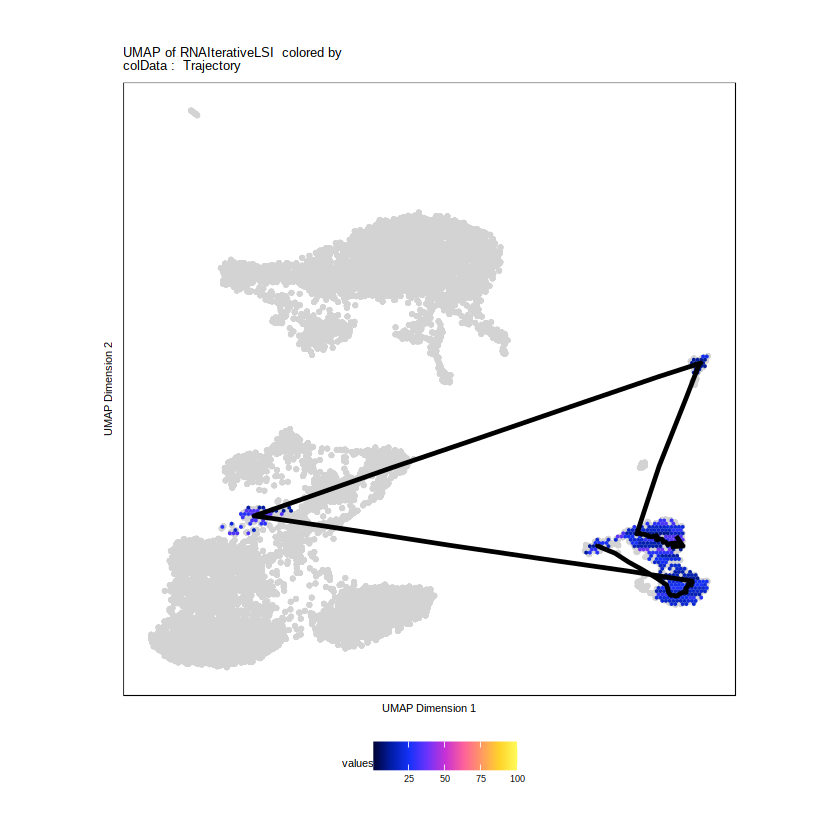

In [15]:
p3 <- suppressMessages(plotTrajectory(proj, trajectory = "Trajectory", colorBy = "cellColData", name = "Trajectory"))
p3[[1]]

In [16]:
proj <- addImputeWeights(proj, reducedDims = "RNAIterativeLSI")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-8d126313cbdac-Date-2023-02-26_Time-21-30-05.log
If there is an issue, please report to github with logFile!

2023-02-26 21:30:05 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Warning message in sprintf("Completed Getting Magic Weights!", round(object.size(weightList)/10^9, :
“one argument not used by format 'Completed Getting Magic Weights!'”


In [17]:
traj <- getTrajectory(proj, "Trajectory", useMatrix="GeneExpressionMatrix")

Creating Trajectory Group Matrix..

Smoothing...



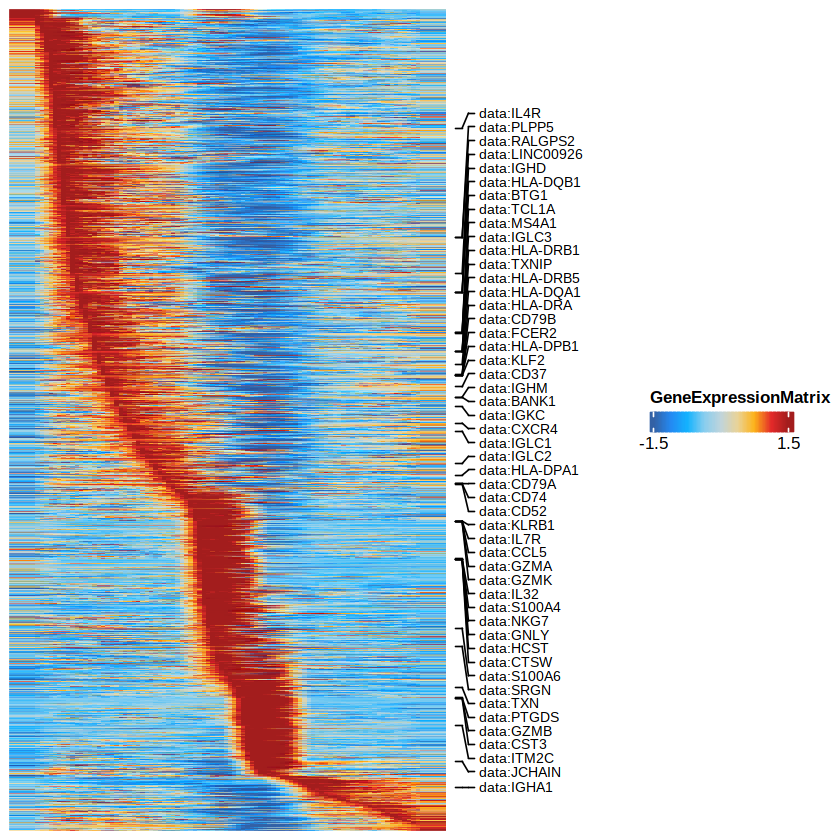

In [18]:
p4 <- suppressMessages(plotTrajectoryHeatmap(traj, pal = paletteContinuous(set = "solarExtra")))
p4

Warning message:
“Removed 9214 rows containing non-finite values (`stat_summary_hex()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


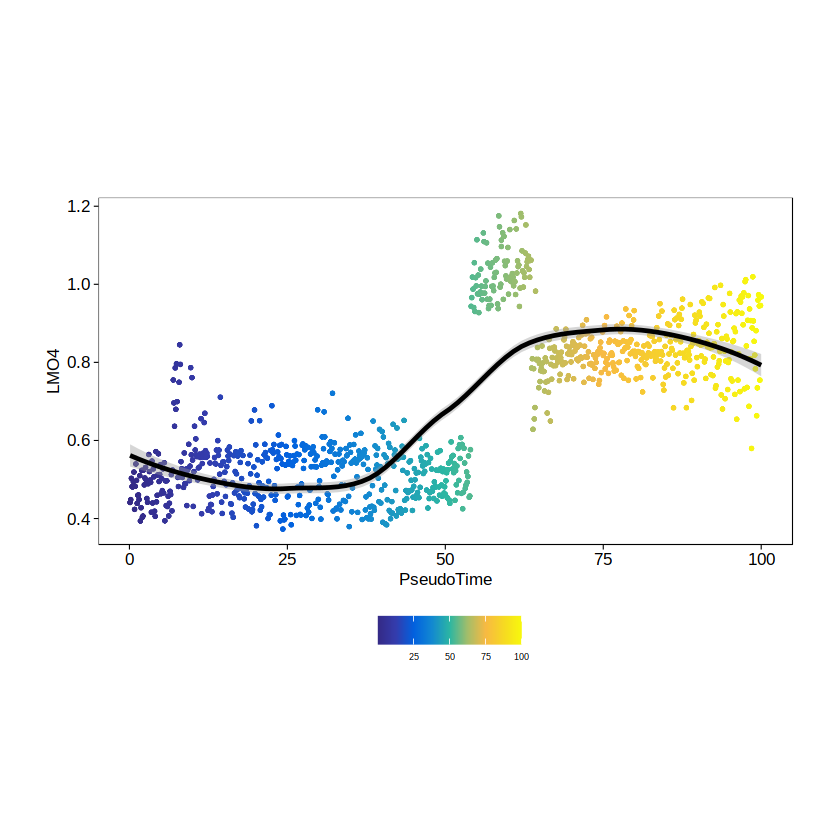

In [19]:
p5 <- suppressMessages(plotTrajectory_(proj, trajectory = "Trajectory", colorBy = "GeneExpressionMatrix", colorMatrixAssay = "data",name = "LMO4", continuousSet = "blueYellow", imputeWeights =  getImputeWeights(proj)))
p5[[2]]

In [20]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.7 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /data/sz753404/miniconda3/envs/schema/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.utf-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.utf-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] circlize_0.4.13                   ComplexHeatmap_2.11.1            
 [3] nabor_0.5.0                       SeuratObject_4.1.3               
 [5] Seurat_4.3.0                      BSgenome.Hsapiens.UCSC.hg19_1.4.3
 [7] BSgenome_1.60.0             